In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# First generate some data

In [19]:
np.random.seed(93)

# Create a binary outcome Y, that we will use as label and a dummy regressor X
n = 1000
X = np.random.binomial(1, 0.5, size=n)  # Dummy variable X (50% chance of 1 or 0)

# Generate Y based on X. 
# Y = X with prob 0.7 and (1-X) with prob 0.3
Y = np.random.binomial(1, p=0.7*X + 0.3*(1-X))


data = pd.DataFrame({'X': X, 'Y': Y})


# Logistic regression with only the intercept

In [20]:
# expected value of constant for logistic regression
prob_Y_1 = data['Y'].value_counts(True)[1]
prob_Y_0 = data['Y'].value_counts(True)[0]

expected_value_of_constant_logistic_regression = np.log(prob_Y_1 / prob_Y_0)

print(f"Unconditional probability that the label is 1: {prob_Y_1:.3f}")
print(f"Unconditional probability that the label is 0: {prob_Y_0:.3f}")
print("")
print(f"Expected value of constant for logistic regression: {expected_value_of_constant_logistic_regression:.3f}")

Unconditional probability that the label is 1: 0.509
Unconditional probability that the label is 0: 0.491

Expected value of constant for logistic regression: 0.036


In [21]:
# Logistic regression with only the intercept (constant model)
X_const = sm.add_constant(np.ones(n))  # Only the constant
model_const = sm.Logit(data['Y'], X_const).fit()

print(model_const.summary())

Optimization terminated successfully.
         Current function value: 0.692985
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      999
Method:                           MLE   Df Model:                            0
Date:                Sat, 19 Oct 2024   Pseudo R-squ.:               2.727e-12
Time:                        18:58:20   Log-Likelihood:                -692.99
converged:                       True   LL-Null:                       -692.99
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0360      0.063      0.569      0.569      -0.088       0.160


# Logistic Regression with the constant and a dummy regressor

In [22]:
# now we have to deal with conditional expectations!
data.value_counts()

X  Y
1  1    357
0  0    355
   1    152
1  0    136
dtype: int64

In [23]:
# value of constant for logistic regression, given that X = 0
prob_Y_1_given_x0 = data.value_counts()[0, 1] / (data.value_counts()[0, 1] + data.value_counts()[0, 0])
prob_Y_0_given_x0 = data.value_counts()[0, 0] / (data.value_counts()[0, 1] + data.value_counts()[0, 0])

constant_when_x_0 = np.log(prob_Y_1_given_x0 / prob_Y_0_given_x0)

print(f"Conditional probability that the label is 1 when x is 0: {prob_Y_1_given_x0:.3f}")
print(f"Conditional probability that the label is 0 when x is 0: {prob_Y_0_given_x0:.3f}")
print("")
print(f"Expected value of constant for logistic regression: {constant_when_x_0:.3f}")

Conditional probability that the label is 1 when x is 0: 0.300
Conditional probability that the label is 0 when x is 0: 0.700

Expected value of constant for logistic regression: -0.848


In [24]:
# parameter for X for logistic regression, given that X = 0
prob_Y_1_given_x0 = data.value_counts()[0, 1] / (data.value_counts()[0, 1] + data.value_counts()[0, 0])
prob_Y_0_given_x0 = data.value_counts()[0, 0] / (data.value_counts()[0, 1] + data.value_counts()[0, 0])

prob_Y_1_given_x1 = data.value_counts()[1, 1] / (data.value_counts()[1, 1] + data.value_counts()[1, 0])
prob_Y_0_given_x1 = data.value_counts()[1, 0] / (data.value_counts()[1, 1] + data.value_counts()[1, 0])

log_odds_Y1_given_x0 = np.log(prob_Y_1_given_x0 / prob_Y_0_given_x0)
log_odds_Y1_given_x1 = np.log(prob_Y_1_given_x1 / prob_Y_0_given_x1)

print(f"Expected value of parameter X for logistic regression: {log_odds_Y1_given_x1 - log_odds_Y1_given_x0:.3f}")


Expected value of parameter X for logistic regression: 1.813


In [25]:
# Logistic regression with the dummy regressor X
X_with_regressor = sm.add_constant(data['X'])  # Add constant and X
model_with_regressor = sm.Logit(data['Y'], X_with_regressor).fit(disp=False)


print(model_with_regressor.summary())


                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Sat, 19 Oct 2024   Pseudo R-squ.:                  0.1342
Time:                        18:58:20   Log-Likelihood:                -600.00
converged:                       True   LL-Null:                       -692.99
Covariance Type:            nonrobust   LLR p-value:                 2.414e-42
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8482      0.097     -8.751      0.000      -1.038      -0.658
X              1.8133      0.140     12.969      0.000       1.539       2.087


# Now let's do it with a continuous independent variable

In [26]:
# Create a continuous variable X (e.g., a uniform distribution)
n = 1000
X = np.random.uniform(0, 10, size=n)  # Continuous variable X

# Generate Y based on X.
Y = np.random.binomial(1, p=1 / (1 + np.exp(-(0.5*X - 2))))

# Create DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Logistic regression with the continuous regressor X
X_with_const = sm.add_constant(data['X'])  # Add constant and X
model_continuous = sm.Logit(data['Y'], X_with_const).fit(disp=False)


print(model_continuous.summary())

                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Sat, 19 Oct 2024   Pseudo R-squ.:                  0.2448
Time:                        18:58:20   Log-Likelihood:                -515.14
converged:                       True   LL-Null:                       -682.15
Covariance Type:            nonrobust   LLR p-value:                 1.277e-74
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9323      0.158    -12.245      0.000      -2.242      -1.623
X              0.4802      0.031     15.286      0.000       0.419       0.542


In [27]:
# Inverse logit function to convert log-odds to probabilities
def inverse_logit(log_odds):
    return 1 / (1 + np.exp(-log_odds))

# Probability of Y=1 for specific values of X (e.g., X=2, X=8)
ll = []
for x_value in np.linspace(start=-4, stop=11, num=16):
    log_odds_x = model_continuous.params[0] + model_continuous.params[1] * x_value
    prob_x = inverse_logit(log_odds_x)
    ll.append((x_value, log_odds_x, prob_x))

prob_df = pd.DataFrame(ll, columns=['x', 'log_odds_x', 'estimated probability'])
prob_df = prob_df.set_index('x')
prob_df['diff_in_log_odds'] = prob_df['log_odds_x'].diff()
prob_df['diff_in_probability'] = prob_df['estimated probability'].diff()

prob_df = prob_df.dropna()

prob_df.head()

,log_odds_x,estimated probability,diff_in_log_odds,diff_in_probability
x,,,,
-3.0,-3.372808,0.033156,0.480165,0.012380
-2.0,-2.892643,0.052518,0.480165,0.019362
-1.0,-2.412478,0.082226,0.480165,0.029708
0.0,-1.932312,0.126495,0.480165,0.044269
1.0,-1.452147,0.189671,0.480165,0.063176


<Axes: title={'center': 'CDF for Y=1 given x'}, xlabel='x'>

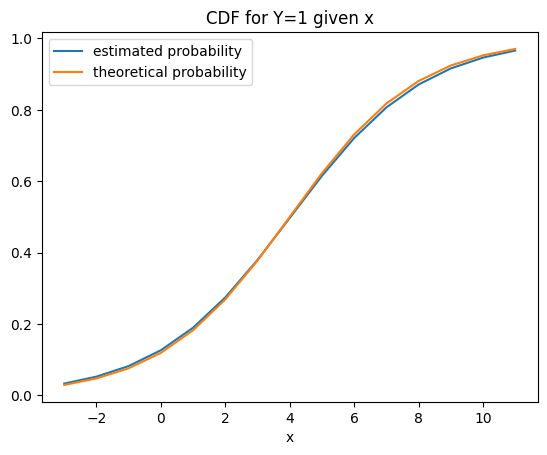

In [28]:
# let's compare the computed probability with the theoretical one
prob_df['theoretical probability'] = 1 / (1 + np.exp(-(0.5*prob_df.index - 2)))

prob_df[['estimated probability', 'theoretical probability']].plot(title='CDF for Y=1 given x')

<Axes: title={'center': 'PDF for Y=1 given x'}, xlabel='x'>

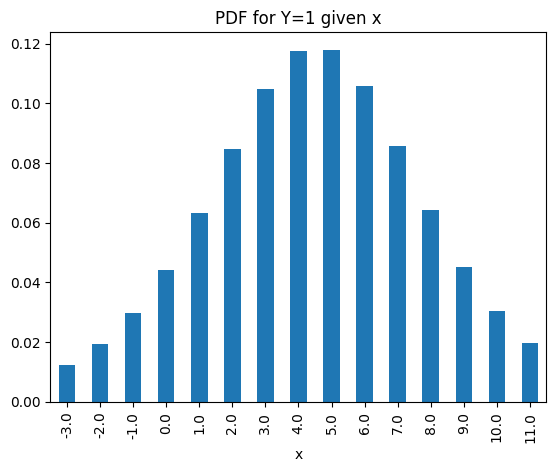

In [29]:
prob_df['diff_in_probability'].plot.bar(title='PDF for Y=1 given x')

# Now let's multiply two continuous variables

In [30]:
#Generate synthetic data for two continuous regressors and their interaction term
np.random.seed(42)

n = 1000
X1 = np.random.uniform(0, 10, size=n)  # Continuous variable X1
X2 = np.random.uniform(0, 10, size=n)  # Continuous variable X2
X1_X2 = X1 * X2                        # Interaction term (product of X1 and X2)

# Generate binary outcome Y based on X1, X2, and the interaction term using a logistic function
logit_function = 0.5 * X1 + 0.3 * X2 + 0.2 * X1_X2 - 5
Y = np.random.binomial(1, p=1 / (1 + np.exp(-logit_function)))

# Create DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X1_X2': X1_X2, 'Y': Y})

# Logistic regression with X1, X2, and their interaction term
X = sm.add_constant(data[['X1', 'X2', 'X1_X2']])  # Add constant term
model = sm.Logit(data['Y'], X).fit(disp=False)

print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Sat, 19 Oct 2024   Pseudo R-squ.:                  0.6464
Time:                        18:58:21   Log-Likelihood:                -223.21
converged:                       True   LL-Null:                       -631.31
Covariance Type:            nonrobust   LLR p-value:                1.327e-176
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4479      0.554     -9.828      0.000      -6.534      -4.362
X1             0.5527      0.089      6.198      0.000       0.378       0.728
X2             0.3258      0.081      4.011      0.0

In [31]:
# Calculate partial derivatives (log-odds sensitivity to X1 and X2)

# Coefficients from the model
beta_0, beta_1, beta_2, beta_3 = model.params

# Log-odds function: log_odds = beta_0 + beta_1 * X1 + beta_2 * X2 + beta_3 * (X1 * X2)
def log_odds(X1, X2):
    return beta_0 + beta_1 * X1 + beta_2 * X2 + beta_3 * (X1 * X2)

# Partial derivative with respect to X1
def partial_derivative_X1(X1, X2):
    return beta_1 + beta_3 * X2

# Partial derivative with respect to X2
def partial_derivative_X2(X1, X2):
    return beta_2 + beta_3 * X1

ll = []
for x1_value in np.linspace(start=-4, stop=11, num=16):
    for x2_value in np.linspace(start=-4, stop=11, num=16):
        p1 = partial_derivative_X1(x1_value, x2_value)
        p2 = partial_derivative_X2(x1_value, x2_value)
        ll.append((x1_value,x2_value, p1,p2))

partial_derivatives_df = pd.DataFrame(ll, columns=['x1', 'x2', 'partial_derivative_X1', 'partial_derivative_X2'])

partial_derivatives_df.head()

,x1,x2,partial_derivative_X1,partial_derivative_X2
0,-4.0,-4.0,-0.253544,-0.480455
1,-4.0,-3.0,-0.051978,-0.480455
2,-4.0,-2.0,0.149588,-0.480455
3,-4.0,-1.0,0.351154,-0.480455
4,-4.0,0.0,0.552720,-0.480455


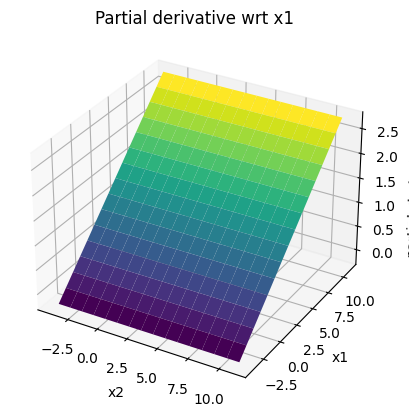

In [32]:
fig = plt.figure()

df_pivot = partial_derivatives_df.pivot(index='x2', columns='x1', values='partial_derivative_X1')
X, Y = np.meshgrid(df_pivot.columns, df_pivot.index)
Z = df_pivot.values

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x2')
ax.set_ylabel('x1')
ax.set_zlabel('partial_derivative_X1')

plt.title('Partial derivative wrt x1')
plt.show()

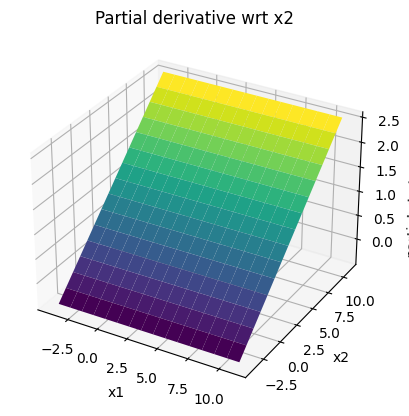

In [33]:
fig = plt.figure()

df_pivot = partial_derivatives_df.pivot(index='x1', columns='x2', values='partial_derivative_X2')
X, Y = np.meshgrid(df_pivot.columns, df_pivot.index)
Z = df_pivot.values

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('partial_derivative_X2')

plt.title('Partial derivative wrt x2')
plt.show()